In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, mean_squared_error

In [9]:
Data_Path = 'E:/Edureka_Python-Course/Data Sources/Day_14/'
df_raw = pd.read_csv(Data_Path+'letterCG.bin', sep=' ') 

In [10]:
df_raw.head().transpose()

,0,1,2,3,4
Class,C,C,G,C,G
x-box,4,3,5,5,4
y-box,10,5,10,9,8
width,5,4,6,6,5
high,8,4,7,7,6
onpix,2,2,3,4,3
x-bar,5,4,8,3,6
y-bar,7,8,7,8,6
x2bar,7,5,8,6,7
y2bar,10,7,8,7,6


In [12]:
#X: df , y: df_raw.Class
features = df_raw.drop('Class', axis=1).copy()
target = df_raw.Class.copy()

In [39]:
train_x, test_x, train_y, test_y = train_test_split(features, target,
                                                    random_state=8,
                                                    test_size=0.2
                                   )

In [52]:
model_DTC = DecisionTreeClassifier(max_depth=1)
model_Ada = AdaBoostClassifier(base_estimator=model_DTC)

cv_10fold = KFold(n_splits=10)

par_grid = {
    'n_estimators': list(range(1,17))
}

gsCV = GridSearchCV(estimator=model_Ada, param_grid=par_grid, cv=cv_10fold)

In [54]:
gsCV.fit(train_x, train_y)
gsCV.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=16)

In [61]:
sorted(gsCV.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

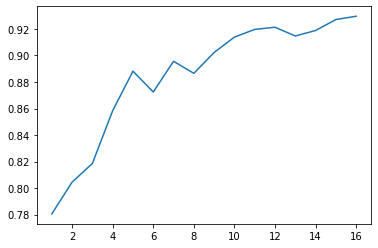

In [65]:
plt.plot(range(1,17), gsCV.cv_results_['mean_test_score'])

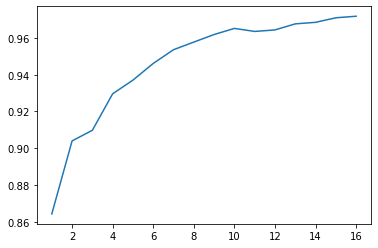

In [67]:
model_DTC = DecisionTreeClassifier(max_depth=2)
model_Ada = AdaBoostClassifier(base_estimator=model_DTC)

cv_10fold = KFold(n_splits=10)

par_grid = {
    'n_estimators': list(range(1,17))
}

gsCV = GridSearchCV(estimator=model_Ada, param_grid=par_grid, cv=cv_10fold)
gsCV.fit(train_x, train_y)
plt.plot(range(1,17), gsCV.cv_results_['mean_test_score'])